In [191]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


В качестве датасета был выбран Fashion-MNIST. Данный датасет является популярным и часто используемым в обучении построения нейронных сетей. Он включает в себя 70000 черно белых изображений вещей гардероба, каждый из которых относится к одному из десяти типов. Каждое изображение представляет собой двумерный массив размером 28х28 со значениями градаций серого 1-255.

In [192]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('Размер обучающей выборки: ', x_train.shape, '\nРазмер тестовой выборки: ', x_test.shape)

Размер обучающей выборки:  (60000, 28, 28) 
Размер тестовой выборки:  (10000, 28, 28)


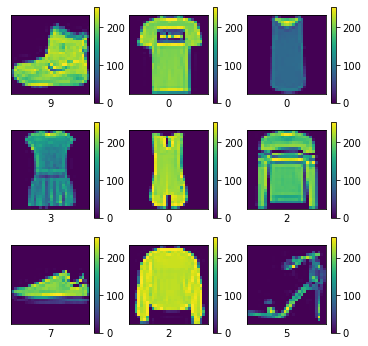

In [193]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    plt.colorbar()
plt.show()

Значения пикселей лежат в интервале от 0 до 255. Нам нужно нормализовать данные, чтобы они имели одинаковый масштаб. Для этого разделим значение каждого пикселя на 255.

In [194]:
x_train = x_train/255.0 
x_test = x_test/255.0

Создаем нейронную сеть и добавляем слои

In [195]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Компиляция модели. На этом шаге выбираем функцию потерь, функцию оптимизации, метрику.

In [196]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели. batch_size определяет кол-во изображений в одном блоке обучения. epochs ограничивает кол-во тренировок до 15 полных обучающих итераций (даст нам тренировку на 900тыс. примерах)

In [197]:
model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=15,
          validation_data=(x_test, y_test)
         )

Epoch 1/15
938/938 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.8252 - val_loss: 0.4254 - val_accuracy: 0.8502
Epoch 2/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3734 - accuracy: 0.8649 - val_loss: 0.3968 - val_accuracy: 0.8578
Epoch 3/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3335 - accuracy: 0.8790 - val_loss: 0.3757 - val_accuracy: 0.8672
Epoch 4/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3088 - accuracy: 0.8861 - val_loss: 0.3657 - val_accuracy: 0.8698
Epoch 5/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2901 - accuracy: 0.8935 - val_loss: 0.3486 - val_accuracy: 0.8729
Epoch 6/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.8967 - val_loss: 0.3385 - val_accuracy: 0.8780
Epoch 7/15
938/938 [==============================] - 1s 2ms/step - loss: 0.2617 - accuracy: 0.9025 - val_loss: 0.3327 - val_accuracy: 0.8839
Epoch 

Точность модели составила примерно 0.89, это значит что модель ошибается в примерно 11 процентах случаев.

In [198]:
predict = model.predict(x_test)
pred = np.array([])
for i in range(len(predict)):
    pred = np.append(pred, np.argmax(predict[i]))

In [207]:
def wrong_predictions(y_pred, y_test):
    dict_false = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
    dict_true = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
    for i in range(len(y_test)):
        if y_test[i] != pred[i]:
            dict_false[y_test[i]] += 1
        else:
            dict_true[y_test[i]] += 1
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.bar(list(dict_false.keys()), dict_false.values(), color='r')
    plt.xticks(np.arange(10), ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'), rotation=20)
    plt.title('Кол-во неверных предсказаний по категориям', fontdict=None, loc='center')
    plt.subplot(1,2,2)
    plt.bar(list(dict_true.keys()), dict_true.values(), color='g')
    plt.xticks(np.arange(10), ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'), rotation=20)
    plt.title('Кол-во верных предсказаний по категориям', fontdict=None, loc='center')    

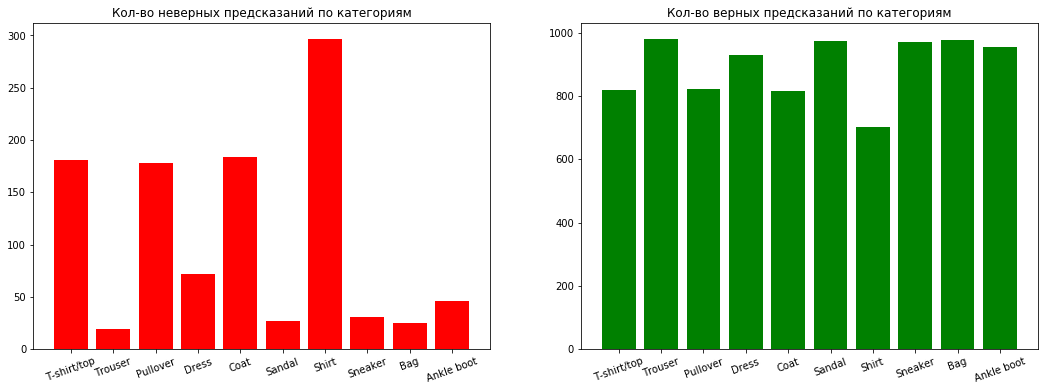

In [208]:
wrong_predictions(pred, y_test)